<a href="https://colab.research.google.com/github/Dennieeeee/Data-Mining-Applications/blob/main/Zillow_Web_Scrapping_%26_Tensorflow_Version_1_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install htmltext
!pip install prettify
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!sudo apt install libmysqlclient-dev
!pip install mysql
!pip install mysql-connector-python-rf


#!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

from datetime import datetime, date
import htmltext
import lxml
from lxml.html.soupparser import fromstring
import math
import mysql.connector
import numbers
import os
import prettify
from pytz import timezone
import pytz
from random import randint
import regex as re
import subprocess
import sys
import time

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_iris 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
print(tf.__version__)


  Created wheel for prettify: filename=prettify-0.1.1-cp36-none-any.whl size=8426 sha256=be5797d7adddbf83440630728979ecc579a6a61c5cb8e7580f9e715aa7b3cb6b
  Stored in directory: /root/.cache/pip/wheels/49/44/c3/f997cb138383a4a0399a6b2f75012746c533a24ff6b02fafe0
Successfully built prettify
     |████████████████████████████████| 911kB 5.7MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learni

In [ ]:
np.set_printoptions(precision=3, suppress=True)

In [ ]:
header = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

In [ ]:
urls = []
links = []
x = 'https://www.zillow.com/homes/{}_rb/'
zip_code = ['10022', '10007', '10469', '11693', '11203']
#'95035','95036','95032','95030','95038','95051'

In [ ]:
# create links with different zip codes and add into url list
for i in zip_code:
    new_link = x.format(i)
    urls.append(new_link)

In [ ]:
print(urls[-1])
print(len(urls))
print(urls)

https://www.zillow.com/homes/11203_rb/
5
['https://www.zillow.com/homes/10022_rb/', 'https://www.zillow.com/homes/10007_rb/', 'https://www.zillow.com/homes/10469_rb/', 'https://www.zillow.com/homes/11693_rb/', 'https://www.zillow.com/homes/11203_rb/']


In [ ]:
'''
def diagnostic_print(run, data_point0=None, data_point1=None, data_point2=None, data_point3=None):
    output_string = "Run: " + str(run)
    if data_point0 != None:
        output_string  = output_string + str("  :  " + str(data_point0))
    if data_point1 != None:
        output_string  = output_string + str("  :  " + str(data_point1))
    if data_point2 != None:
        output_string  = output_string + str("  :  " + str(data_point2))
    if data_point3 != None:
        output_string  = output_string + str("  :  " + str(data_point3))
    print(output_string)
    
# get lists of price, house info, address
price = []
house_info = []
address = []
real_estate = []
last_updated = []
links = []

url_list = [] #relocated to for loop
request_list = [] #relocated to for loop
soup_list = [] #relocated to for loop
error_flag = 0

for url in urls:

    #populate URL list with zillow links
    url_list.append(url) #This is for zipcodes

for i in range(len(url_list)):
    #populate the request list with sessions
    request_list.append(requests.Session().get(url_list[i], headers=header))

    #populate soup list with information from URLs
    soup_list.append(BeautifulSoup(request_list[i].content, 'html.parser'))

    if i == 0:
          diagnostic_print("Zip code", i, url_list[i], request_list[i])
    
    error_check = str(soup_list[0])
    error_checker = error_check.find("Please verify you're a human to continue.")
    if error_checker != -1:
        error_message = "Crawling error (captcha).  Will attempt to snooze for 7 mins and see if that helps."
        error_flag = 1
        diagnostic_print(error_message)
    time.sleep(10)
    continue

    response = requests.get(url_list[i], headers=header)
    data = response.text

    soup = BeautifulSoup(data, 'html.parser')

    amount = list(soup.find_all('div', class_='list-card-price'))
    for i in amount:
        price.append(i.text)

    beds = list(soup.find_all('ul',class_='list-card-details'))
    for i in beds:
        house_info.append(i.text)

    x = list(soup.find_all('address',class_='list-card-addr'))
    for i in x:
        address.append(i.text)

    types = list(soup.find_all('div', {'class': 'list-card-footer'}))
    for i in types:
        real_estate.append(i.text)
        
    updated = list(soup.find_all('div', {'class': 'list-card-top'}))
    for i in updated:
        last_updated.append(i.text)
        
    link = list(soup.find_all(class_= 'list-card-link'))
    for i in link:
        links.append(i.text)

    c = list(soup.find_all("ul", class_="list-card-details"))
    for i in c:
        star_rooms.append(i.text)
'''

'\ndef diagnostic_print(run, data_point0=None, data_point1=None, data_point2=None, data_point3=None):\n    output_string = "Run: " + str(run)\n    if data_point0 != None:\n        output_string  = output_string + str("  :  " + str(data_point0))\n    if data_point1 != None:\n        output_string  = output_string + str("  :  " + str(data_point1))\n    if data_point2 != None:\n        output_string  = output_string + str("  :  " + str(data_point2))\n    if data_point3 != None:\n        output_string  = output_string + str("  :  " + str(data_point3))\n    print(output_string)\n    \n# get lists of price, house info, address\nprice = []\nhouse_info = []\naddress = []\nreal_estate = []\nlast_updated = []\nlinks = []\n\nurl_list = [] #relocated to for loop\nrequest_list = [] #relocated to for loop\nsoup_list = [] #relocated to for loop\nerror_flag = 0\n\nfor url in urls:\n\n    #populate URL list with zillow links\n    url_list.append(url) #This is for zipcodes\n\nfor i in range(len(url_list

In [ ]:
price = []
bed=[]
bath=[]
sqft=[]
house_info=[]
address = []
real_estate = []
last_updated = []
links = []

for url in urls:
    response = requests.get(url, headers=header)
    data = response.text

    soup = BeautifulSoup(data, 'html.parser')
    amount = list(soup.find_all('div', class_='list-card-price'))
    for i in amount:
        price.append(i.text)

    for house in soup.find_all('ul', class_='list-card-details'):
        house_info.append([i.text for i in house.find_all('li', class_='')])

    x = list(soup.find_all('address', class_='list-card-addr'))
    for i in x:
        address.append(i.text)
    
    
    #detail = soup.find_all('div', {'class': 'list-card-details'}) #This doesn't seem to work, but looks useful
    #for i in detail:
    #    details.append(detail)
        
    types = list(soup.find_all('div', {'class': 'list-card-footer'}))
    for i in types:
        real_estate.append(i.text)
        
    updated = list(soup.find_all('div', {'class': 'list-card-top'}))
    for i in updated:
        last_updated.append(i.text)
        
    link = list(soup.find_all('a',class_= 'list-card-link list-card-link-top-margin'))
    for i in link:
        links.append(i.get('href'))

In [ ]:
print(len(price))
print(len(house_info))
print(len(address))
print(len(real_estate))
print(len(last_updated))
print(len(links))

182
182
182
182
182
182


In [ ]:
print(house_info)

[['4 bds,', '4 ba,', '-- sqft'], ['1 bd,', '1 ba,', '-- sqft'], ['2 bds,', '3 ba,', '988,829 sqft'], ['Studio,', '4 ba,', '3,420 sqft'], ['1 bd,', '1 ba,', '825 sqft'], ['1 bd,', '1 ba,', '93,153 sqft'], ['3 bds,', '3 ba,', '-- sqft'], ['3 bds,', '4 ba,', '2,550 sqft'], ['1 bd,', '1 ba,', '785 sqft'], ['4 bds,', '4 ba,', '-- sqft'], ['1 bd,', '1 ba,', '-- sqft'], ['1 bd,', '1 ba,', '650 sqft'], ['Studio,', '1 ba,', '197,972 sqft'], ['3 bds,', '4 ba,', '2,200 sqft'], ['2 bds,', '2 ba,', '1,425 sqft'], ['1 bd,', '1 ba,', '-- sqft'], ['3 bds,', '2 ba,', '2,000 sqft'], ['2 bds,', '2 ba,', '1,200 sqft'], ['2 bds,', '2 ba,', '1,305 sqft'], ['Studio,', '1 ba,', '830 sqft'], ['2 bds,', '3 ba,', '3,000 sqft'], ['Studio,', '1 ba,', '700 sqft'], ['1 bd,', '2 ba,', '89,349 sqft'], ['3 bds,', '3 ba,', '1,950 sqft'], ['2 bds,', '2 ba,', '1,521 sqft'], ['3 bds,', '4 ba,', '2,347 sqft'], ['1 bd,', '2 ba,', '750 sqft'], ['1 bd,', '1 ba,', '850 sqft'], ['2 bds,', '2 ba,', '1,600 sqft'], ['1 bd,', '1 ba,

In [ ]:
house=[]
for item in house_info:
  house.append(''.join(item[:]))

['4 bds,4 ba,-- sqft', '1 bd,1 ba,-- sqft', '2 bds,3 ba,988,829 sqft', 'Studio,4 ba,3,420 sqft', '1 bd,1 ba,825 sqft', '1 bd,1 ba,93,153 sqft', '3 bds,3 ba,-- sqft', '3 bds,4 ba,2,550 sqft', '1 bd,1 ba,785 sqft', '4 bds,4 ba,-- sqft', '1 bd,1 ba,-- sqft', '1 bd,1 ba,650 sqft', 'Studio,1 ba,197,972 sqft', '3 bds,4 ba,2,200 sqft', '2 bds,2 ba,1,425 sqft', '1 bd,1 ba,-- sqft', '3 bds,2 ba,2,000 sqft', '2 bds,2 ba,1,200 sqft', '2 bds,2 ba,1,305 sqft', 'Studio,1 ba,830 sqft', '2 bds,3 ba,3,000 sqft', 'Studio,1 ba,700 sqft', '1 bd,2 ba,89,349 sqft', '3 bds,3 ba,1,950 sqft', '2 bds,2 ba,1,521 sqft', '3 bds,4 ba,2,347 sqft', '1 bd,2 ba,750 sqft', '1 bd,1 ba,850 sqft', '2 bds,2 ba,1,600 sqft', '1 bd,1 ba,-- sqft', '3 bds,2 ba,1,450 sqft', 'Studio,1 ba,545 sqft', '2 bds,2 ba,1,085 sqft', '3 bds,3 ba,1,795 sqft', '1 bd,1 ba,-- sqft', '2 bds,2 ba,1,500 sqft', 'Studio,1 ba,-- sqft', '1 bd,2 ba,169,868 sqft', '1 bd,2 ba,510,547 sqft', '3 bds,2 ba,169,868 sqft', '5 bds,7 ba,6,127 sqft', '2 bds,3 ba,1

In [ ]:
house_data = []
house_data.append(price)
house_data.append(address)
house_data.append(real_estate)
house_data.append(last_updated)
house_data.append(links)
house_data.append(house)

dict = {'price':house_data[0], 'address':house_data[1], 'real_estate':house_data[2], 'last_updated':house_data[3], 'link':house_data[4], 'house_info':house_data[5]}
data = pd.DataFrame(dict)
print(data.shape)

(182, 6)


In [ ]:
df = data.copy()

In [ ]:
df.head(1)

,price,address,real_estate,last_updated,link,house_info
0,"$995,000","303 E 57th St #37DE, New York, NY 10022",LISTING BY: DOUGLAS ELLIMAN (212-891-7674),1 day on Zillow,https://www.zillow.com/homedetails/303-E-57th-...,"4 bds,4 ba,-- sqft"


In [ ]:
df[['beds','baths','sq_feet']]=df['house_info'].str.split(',',2, expand=True)

In [ ]:
df['prices'] = df['price'].apply(lambda x: x[1:])

In [ ]:
#df[['redundant','baths']] = df['baths'].str.split(',',n=1,expand=True)

In [ ]:
df['sq_feet']=df['sq_feet'].replace(' sqft','',regex=True)

In [ ]:
df['sq_feet'] = df['sq_feet'].replace('lot-', None, regex=True)

In [ ]:
df['sq_feet'] = df['sq_feet'].replace('--', None,regex=True)
df['sq_feet'] = df['sq_feet'].replace('sqft-', None,regex=True)
df['sq_feet'] = df['sq_feet'].replace(',','', regex=True)
df['sq_feet'] = df['sq_feet'].replace('--', '',regex=True)
#df['sq_feet'] = df['sq_feet'].replace('', None,regex=True)
df['sq_feet'] = df['sq_feet'].where(pd.notnull(df['sq_feet']), None)

In [ ]:
df['sq_feet'] = df['sq_feet'].fillna(0)
df['sq_feet'] = pd.to_numeric(df['sq_feet'])

In [ ]:
df['sq_feet'].dtype

dtype('float64')

In [ ]:
df[['street_name','city','state_zip_code']]=df['address'].str.split(',',n=2, expand=True)

In [ ]:
#drop unnecessary columns
feature_drop = ['price','house_info', 'address']
df1 = df.drop(feature_drop, axis=1)

In [ ]:
print(list(df1.columns.values))

['real_estate', 'last_updated', 'link', 'beds', 'baths', 'sq_feet', 'prices', 'street_name', 'city', 'state_zip_code']


In [ ]:
#reorder columns
zillow_df = df1[['prices','beds','baths','sq_feet','street_name',
       'city', 'state_zip_code', 'real_estate', 'last_updated','link']]

In [ ]:
zillow_df.shape

(182, 10)

# Data Cleansing

In [ ]:
# Remove K and comma from prices
# Convert to float data type
zillow_df['prices'] = zillow_df['prices'].str.replace('K','')
zillow_df['prices'] = zillow_df['prices'].str.replace(',','').astype(float)

In [ ]:
# Replace Studio and comma with blank
# Replace Studio,-- with 
zillow_df['beds']=zillow_df['beds'].replace('Studio,--', None)
zillow_df['beds']=zillow_df['beds'].replace('--', None)
zillow_df['beds']=zillow_df['beds'].replace('Studio,','',regex=True)
zillow_df['beds']=zillow_df['beds'].replace(',', '',regex=True)
zillow_df['beds']=zillow_df['beds'].replace('bd', '',regex=True)
zillow_df['beds']=zillow_df['beds'].replace('Studio',None,regex=True)
zillow_df['beds']=zillow_df['beds'].replace('s','',regex=True)
zillow_df['beds']=zillow_df['beds'].replace('-- ', None)
zillow_df['beds'] = zillow_df['beds'].where(pd.notnull(zillow_df['beds']), None)

In [ ]:
zillow_df['beds'] = zillow_df['beds'].fillna(0)
zillow_df['beds'] = pd.to_numeric(zillow_df['beds'])

In [ ]:
# Extract the number of bathrooms
zillow_df['baths'] = zillow_df['baths'].replace('--', None, regex=True)
zillow_df['baths'] = zillow_df['baths'].replace('ba', '')
zillow_df['baths'] = zillow_df['baths'].str.replace(',','')
zillow_df['baths'] = zillow_df['baths'].str.split(' ',2, expand=True)

In [ ]:
zillow_df['baths'] = zillow_df['baths'].fillna(0)
zillow_df['baths'] = pd.to_numeric(zillow_df['baths'])

In [ ]:
zillow_df = zillow_df.where(pd.notnull(zillow_df), None)

In [ ]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prices          182 non-null    float64
 1   beds            182 non-null    int64  
 2   baths           182 non-null    int64  
 3   sq_feet         182 non-null    float64
 4   street_name     182 non-null    object 
 5   city            182 non-null    object 
 6   state_zip_code  182 non-null    object 
 7   real_estate     182 non-null    object 
 8   last_updated    182 non-null    object 
 9   link            182 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 14.3+ KB


In [ ]:
zillow_df.to_csv('data.csv')

In [ ]:
#Trim outliers custom_audience_ads dataset:
starting_percentile = zillow_df['prices'].quantile(.02)
ending_percentile = zillow_df['prices'].quantile(.98)
outliers_df = zillow_df.loc[((zillow_df['prices'] <= starting_percentile) | (zillow_df['prices'] >= ending_percentile))]
df_trimmed = zillow_df.loc[((zillow_df['prices'] > starting_percentile) & (zillow_df['prices'] < ending_percentile))]

In [ ]:
zillow_df.describe()

,prices,beds,baths,sq_feet
count,1.820000e+02,182.000000,182.000000,182.000000
mean,1.985313e+06,3.241758,13.730769,16162.576923
std,3.596261e+06,2.109388,90.425508,85963.862245
min,5.730000e+02,1.000000,0.000000,0.000000
25%,5.915000e+05,2.000000,2.000000,1219.500000
50%,7.490000e+05,3.000000,2.000000,1780.500000
75%,2.106250e+06,4.000000,3.000000,2710.500000
max,3.950000e+07,13.000000,954.000000,988829.000000


In [ ]:
zillow_df = zillow_df[zillow_df['beds'] < 100]
zillow_df = zillow_df[zillow_df['baths'] < 200]
zillow_df = zillow_df[zillow_df['sq_feet'] < 100000]

In [ ]:
zillow_df.head()

,prices,beds,baths,sq_feet,street_name,city,state_zip_code,real_estate,last_updated,link
0,995000.0,4,4,0.0,303 E 57th St #37DE,New York,NY 10022,LISTING BY: DOUGLAS ELLIMAN (212-891-7674),1 day on Zillow,https://www.zillow.com/homedetails/303-E-57th-...
1,675000.0,1,1,0.0,333 E 53rd St APT 4G,New York,NY 10022,LISTING BY: SOTHEBY'S INTERNATIONAL REALTY (21...,1 day on Zillow,https://www.zillow.com/homedetails/333-E-53rd-...
3,4850000.0,2,4,3420.0,405 E 50th St,New York,NY 10022,"LISTING BY: VIOLETA GALE COHN, LREB (646-307-3...",2 days on Zillow,https://www.zillow.com/homedetails/405-E-50th-...
4,725000.0,1,1,825.0,60 Sutton Pl S APT 7AN,New York,NY 10022,LISTING BY: BROWN HARRIS STEVENS (212-317-7855),2 days on Zillow,https://www.zillow.com/homedetails/60-Sutton-P...
5,500000.0,1,1,93153.0,227 E 57th St APT 7D,New York,NY 10022,LISTING BY: WEICHERT PROPERTIES - SOHO (860-49...,2 days on Zillow,https://www.zillow.com/homedetails/227-E-57th-...


# Data Visualization

Baths

Text(0, 0.5, 'Number of Bathrooms')

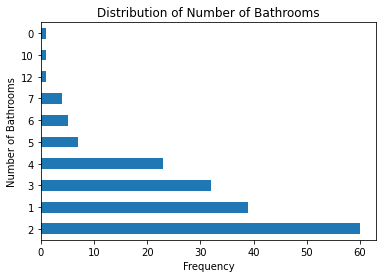

In [ ]:
zillow_df['baths'].value_counts().plot.barh()
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Frequency')
plt.ylabel('Number of Bathrooms')

Text(0, 0.5, 'Number of Bedrooms')

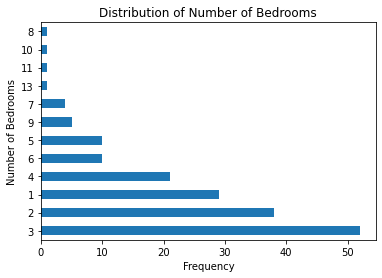

In [ ]:
zillow_df['beds'].value_counts().plot.barh()
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Frequency')
plt.ylabel('Number of Bedrooms')

City

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cities')

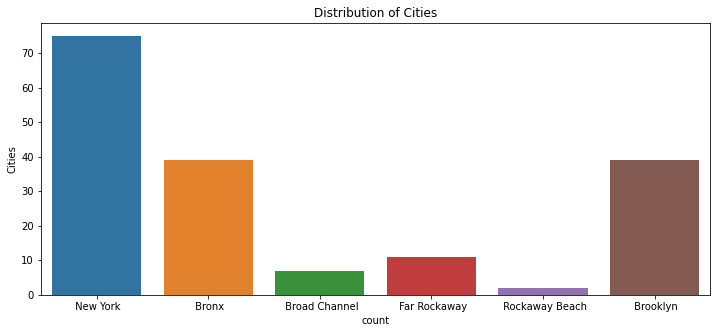

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(zillow_df['city'])
plt.title('Distribution of Cities')
plt.xlabel('count')
plt.ylabel('Cities')

Real Estate

In [ ]:
# Listings distribution
grouped_df =zillow_df.groupby(by='real_estate',as_index=False)['street_name'].count()
sorted_grouped_df =grouped_df.sort_values(by='street_name',ascending=False)
top10=sorted_grouped_df.iloc[0:10]

In [ ]:
top10

,real_estate,street_name
31,LISTING BY: COMPASS,9
93,LISTING BY: KEYSTONE REALTY USA CORP (347-419-...,5
76,LISTING BY: EXP REALTY,4
70,LISTING BY: DOUGLAS ELLIMAN (917-873-9304),4
69,LISTING BY: DOUGLAS ELLIMAN (718-840-2033),3
123,LISTING BY: ROCKAWAY PROPERTIES,3
131,LISTING BY: TABAK REAL ESTATE (646-246-5381),2
80,LISTING BY: FILLMORE REAL ESTATE LTD (718-377-...,2
64,LISTING BY: DOUGLAS ELLIMAN (212-891-7284),2
90,LISTING BY: KELLER WILLIAMS REALTY,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 Real Estates')

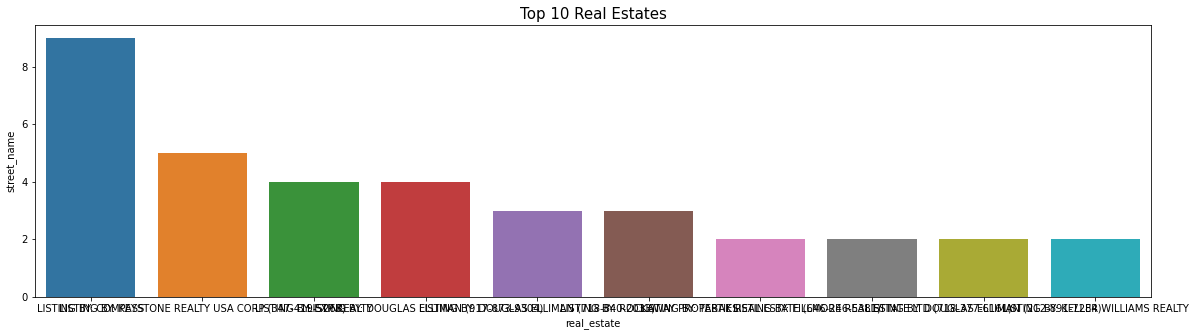

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot('real_estate','street_name',data=top10)
plt.title('Top 10 Real Estates',size=15)

Boxplots - prices, square feet, beds, baths

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Prices (10 Millions)')

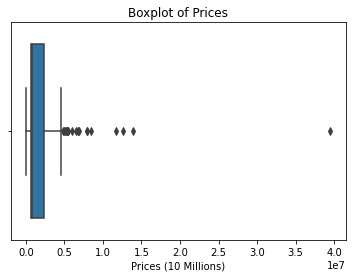

In [ ]:
sns.boxplot(zillow_df['prices'])
plt.title('Boxplot of Prices')
plt.xlabel('Prices (10 Millions)')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Squre Feet')

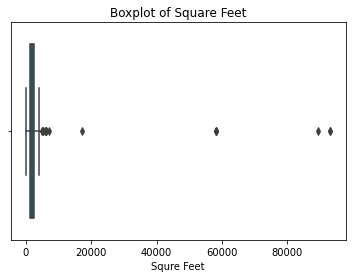

In [ ]:
sns.boxplot(zillow_df['sq_feet'])
plt.title('Boxplot of Square Feet')
plt.xlabel('Squre Feet')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'baths')

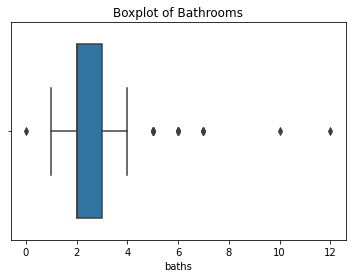

In [ ]:
sns.boxplot(zillow_df['baths'])
plt.title('Boxplot of Bathrooms')
plt.xlabel('baths')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'beds')

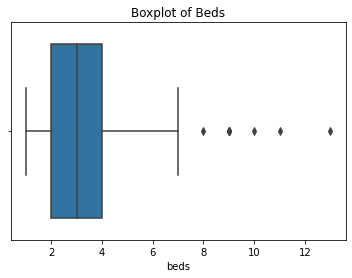

In [ ]:
sns.boxplot(zillow_df['beds'])
plt.title('Boxplot of Beds')
plt.xlabel('beds')

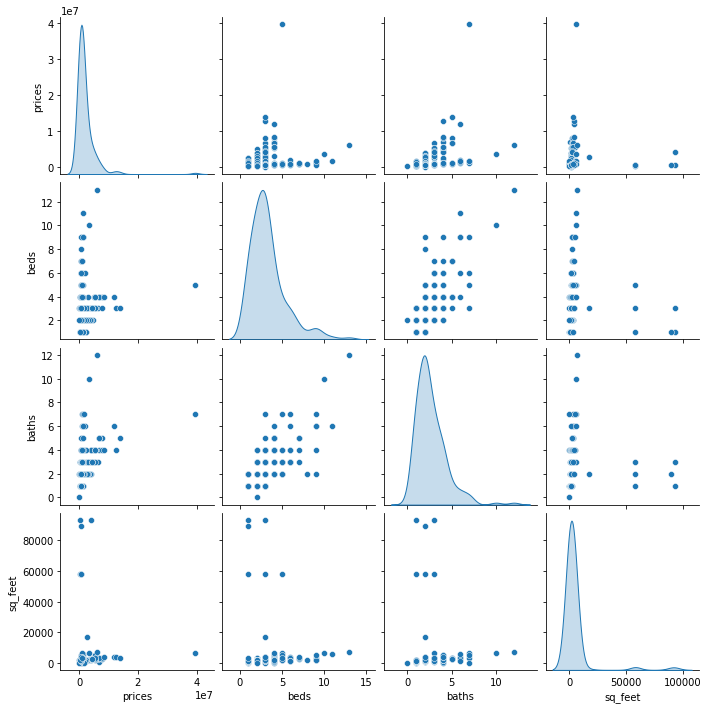

In [ ]:
sns.pairplot(zillow_df[['prices', 'beds', 'baths', 'sq_feet']], diag_kind='kde')

In [ ]:
df=zillow_df.groupby(['real_estate'])['beds'].mean().to_frame().rename(columns={'id':'count'}).reset_index()

In [ ]:
df = df[df['real_estate'] != '/']

In [ ]:
sorted_grouped_df = df.sort_values(by='beds',ascending=False)
top10=sorted_grouped_df.iloc[0:10]

In [ ]:
top10

,real_estate,beds
138,LISTING BY: WILLIAM RAVEIS REAL ESTATE (202-30...,13.0
74,LISTING BY: EQUITY SMART REALTY INC (310-499-8...,11.0
16,LISTING BY: BROWN HARRIS STEVENS (212-588-5644),10.0
98,LISTING BY: MENORA HOME MANAGEMENT CORP (718-8...,9.0
100,LISTING BY: MOTIVATED ACCESS REALTY CORP.,9.0
89,LISTING BY: KCB 1 REALTY LLC,9.0
39,LISTING BY: CONTINENTAL REAL ESTATE GROUP,9.0
109,LISTING BY: PENA LOUIS B (347-985-0711),9.0
10,LISTING BY: BRIGHTSTONE REALTY LLC,8.0
97,LISTING BY: MAYJAY PROPERTY MANAGEMENT,7.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 Distribution of Type of Houses in Average')

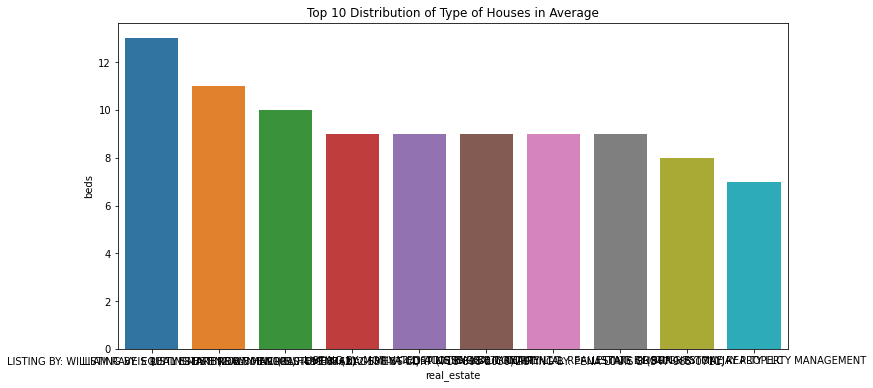

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot('real_estate','beds',data=top10)
plt.title('Top 10 Distribution of Type of Houses in Average')

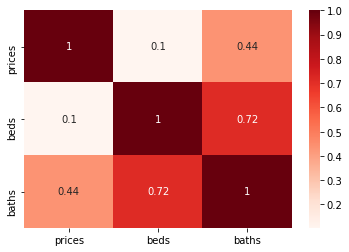

In [ ]:
sns.heatmap(zillow_df[['prices','beds','baths']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Database Setup

In [ ]:
try:
  mydb = mysql.connector.connect(user='root5', password='!GoodPassword123!',
                        host='34.123.115.192',
                        port=3306
                        )
except:
  print("Error in fetching ip...  snoozing for 30 seconds and retrying")
  time.sleep(3)

In [ ]:
'''
mydb = mysql.connector.connect(user='root5', password='!GoodPassword123!',
                          host='34.123.115.192',
                          port=3306
                          )
'''

"\nmydb = mysql.connector.connect(user='root5', password='!GoodPassword123!',\n                          host='34.123.115.192',\n                          port=3306\n                          )\n"

In [ ]:
mycursor = mydb.cursor()

In [ ]:
# check if connection is successful or not
if (mydb):
  print('Connection Successful')
else:
  print('Unsuccessful')
  

Connection Successful


In [ ]:
mydb

In [ ]:
try:
  mycursor.execute('Create database zillowdb;')
except:
  print('Database exists.')

Database exists.


In [ ]:
mycursor.execute('Show databases')

In [ ]:
for db in mycursor:
  print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('test_schema',)
('zillowdb',)


In [ ]:
# point to the right database
mydb = mysql.connector.connect(user='root5', password='!GoodPassword123!',
                          host='34.123.115.192',
                          database= 'zillowdb'
                          )

In [ ]:
mycursor = mydb.cursor()

In [ ]:
mycursor.execute("DROP TABLE IF EXISTS house_details_results_preliminary;")

In [ ]:
mycursor.execute("""CREATE TABLE house_details_results_preliminary (
    prices float NOT NULL, 
    beds float DEFAULT NULL, 
    baths float DEFAULT NULL, 
    sq_feet float DEFAULT NULL, 
    type varchar(300) DEFAULT NULL, 
    address varchar(300) DEFAULT NULL,
    street_name varchar(300) DEFAULT NULL,
    city varchar(300) DEFAULT NULL,
    state_zip_code varchar(300) DEFAULT NULL,
    real_estate varchar(300) DEFAULT NULL,
    last_updated varchar(300) DEFAULT NULL,
    link varchar(300) DEFAULT NULL)""")

In [ ]:
mycursor.execute('Show Tables;')

In [ ]:
def insert_results_to_db(zillow_df):
  mydb = mysql.connector.connect(user='root5', password='!GoodPassword123!',
                        host='34.123.115.192', database= 'zillowdb',
                        port=3306
                        )
  cursor = mydb.cursor()
  record_count = 0
  cols = ",".join([str(i) for i in zillow_df.columns.tolist()])
  for i, row in zillow_df.iterrows():
    sql = "INSERT INTO house_details_results_preliminary (" + cols + ") VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))
    mydb.commit()
    record_count += 1
  mydb.close()
  print(record_count)

In [ ]:
a = insert_results_to_db(zillow_df)
print(a)

173
None


In [ ]:
dataset = zillow_df.copy()
dataset.tail()

,prices,beds,baths,sq_feet,street_name,city,state_zip_code,real_estate,last_updated,link
177,3450000.0,10,10,6135.0,331 E 52nd St,Brooklyn,NY 11203,LISTING BY: BROWN HARRIS STEVENS (212-588-5644),"Price cut: $500,000 (Jan 30)",https://www.zillow.com/homedetails/331-E-52nd-...
178,849000.0,4,3,6135.0,3823 Foster Ave FLOOR 2,Brooklyn,NY 11203,LISTING BY: FILLMORE REAL ESTATE LTD (718-377-...,89 days on Zillow,https://www.zillow.com/homedetails/3823-Foster...
179,1100000.0,7,4,3652.0,216 E 52nd St APT 4,Brooklyn,NY 11203,LISTING BY: FILLMORE REAL ESTATE LTD (718-377-...,89 days on Zillow,https://www.zillow.com/homedetails/216-E-52nd-...
180,530000.0,3,2,3652.0,332 E 59th St,Brooklyn,NY 11203,LISTING BY: UNLIMITED HOMES REALTY INC,89 days on Zillow,https://www.zillow.com/homedetails/332-E-59th-...
181,860000.0,5,3,3420.0,980 Utica Ave,Brooklyn,NY 11203,LISTING BY: 1 OAK REAL ESTATE HUB INC,89 days on Zillow,https://www.zillow.com/homedetails/980-Utica-A...


In [ ]:
#check missing value
dataset.isna().sum()

prices            0
beds              0
baths             0
sq_feet           0
street_name       0
city              0
state_zip_code    0
real_estate       0
last_updated      0
link              0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 181
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prices          173 non-null    float64
 1   beds            173 non-null    int64  
 2   baths           173 non-null    int64  
 3   sq_feet         173 non-null    float64
 4   street_name     173 non-null    object 
 5   city            173 non-null    object 
 6   state_zip_code  173 non-null    object 
 7   real_estate     173 non-null    object 
 8   last_updated    173 non-null    object 
 9   link            173 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 19.9+ KB


In [ ]:
#drop irrelevant columns
feature_drop = ['real_estate','street_name', 'city','state_zip_code','last_updated', 'link']
dataset1 = dataset.drop(feature_drop, axis=1)
dataset1

,prices,beds,baths,sq_feet
0,995000.0,4,4,0.0
1,675000.0,1,1,0.0
3,4850000.0,2,4,3420.0
4,725000.0,1,1,825.0
5,500000.0,1,1,93153.0
...,...,...,...,...
177,3450000.0,10,10,6135.0
178,849000.0,4,3,6135.0
179,1100000.0,7,4,3652.0
180,530000.0,3,2,3652.0


In [ ]:
#Now split the dataset into a training set and a test set.
#Use the test set in the final evaluation of our models.
train_dataset = dataset1.sample(frac=0.8, random_state=0)
test_dataset = dataset1.drop(train_dataset.index)

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prices,138.0,2.080556e+06,3.892020e+06,573.0,604000.00,832000.0,2258750.0,39500000.0
beds,138.0,3.362319e+00,2.253763e+00,1.0,2.00,3.0,4.0,13.0
baths,138.0,2.731884e+00,1.814539e+00,0.0,2.00,2.0,4.0,12.0
sq_feet,138.0,5.294761e+03,1.544636e+04,0.0,1232.25,1812.0,2798.5,93153.0


In [ ]:
#Separate the target value price
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('prices')
test_labels = test_features.pop('prices')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
prices,2.080556e+06,3.892020e+06
beds,3.362319e+00,2.253763e+00
baths,2.731884e+00,1.814539e+00
sq_feet,5.294761e+03,1.544636e+04


In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[   3.362    2.732 5294.761]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   3.    2. 1951.]]

Normalized: [[-0.16 -0.4  -0.22]]


## Linear regression

In [ ]:
#Start with a single-variable linear regression, to predict 'prices' from beds.
sqf = np.array(train_features['sq_feet'])
sqf_normalizer = preprocessing.Normalization(input_shape=[1,])
sqf_normalizer.adapt(sqf)

In [ ]:
#Build the sequential model
sqf_model = tf.keras.Sequential([
    sqf_normalizer,
    layers.Dense(units=1)
])
sqf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
sqf_model.predict(sqf[:10])

array([[-0.054],
       [-0.072],
       [-0.05 ],
       [-0.034],
       [-0.063],
       [-0.053],
       [-0.073],
       [ 0.863],
       [-0.068],
       [-0.055]], dtype=float32)

In [ ]:
sqf_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = sqf_model.fit(
    train_features['sq_feet'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 8.5 s, sys: 149 ms, total: 8.65 s
Wall time: 8.89 s


In [ ]:
#Visualize the model's training progress 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,1775099.375,3280376.75,95
96,1775098.875,3280376.25,96
97,1775098.625,3280376.25,97
98,1775098.125,3280375.75,98
99,1775097.625,3280375.50,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [prices]')
  plt.legend()
  plt.grid(True)

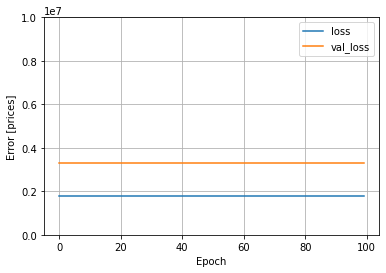

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['sqf_model'] = sqf_model.evaluate(
    test_features['sq_feet'],
    test_labels, verbose=0)
x = tf.linspace(0.0, 7000, 7001)
y = sqf_model.predict(x)

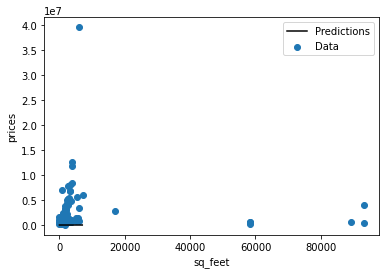

In [ ]:
def plot_sqf(x, y):
  plt.scatter(train_features['sq_feet'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('sq_feet')
  plt.ylabel('prices')
  plt.legend()

plot_sqf(x, y)

Since used single variable to predict prices didn't have good result and linear relationship, we will try to put multiple variables next

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])

array([[ 0.287],
       [ 1.265],
       [-0.09 ],
       [-0.674],
       [-1.647],
       [-0.501],
       [ 1.266],
       [ 1.153],
       [ 0.477],
       [-0.501]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.885],
       [-0.34 ],
       [-0.03 ]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 8.18 s, sys: 137 ms, total: 8.32 s
Wall time: 8.21 s


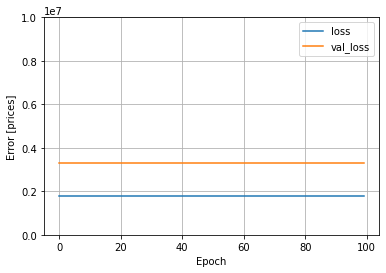

In [ ]:
plot_loss(history)

In [ ]:
#Collect the results on the test set
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# DNN regression

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

# One variable

In [ ]:
#Start with a DNN model for a single input: "sq_feet"
dnn_sqf_model = build_and_compile_model(sqf_normalizer)

In [ ]:
dnn_sqf_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
#Train the model:
history = dnn_sqf_model.fit(
    train_features['sq_feet'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

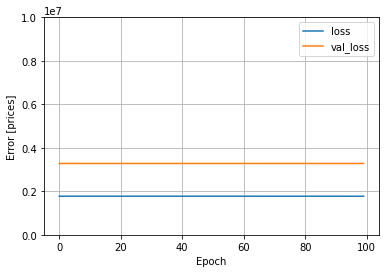

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 7000, 7001)
y = dnn_sqf_model.predict(x)

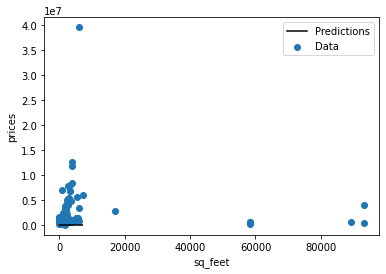

In [ ]:
plot_sqf(x, y)

In [ ]:
test_results['dnn_sqf_model'] = dnn_sqf_model.evaluate(
    test_features['sq_feet'], test_labels,
    verbose=0)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 3)                 7         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,488
Trainable params: 4,481
Non-trainable params: 7
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.26 s, sys: 165 ms, total: 8.43 s
Wall time: 8.23 s


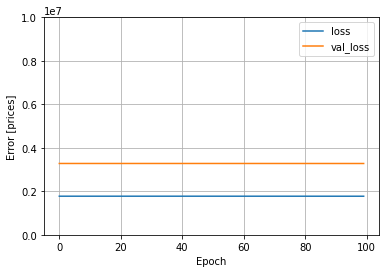

In [ ]:
plot_loss(history)

In [ ]:
#Collect the results on the test set:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [sq_feet]']).T

,Mean absolute error [sq_feet]
sqf_model,1874024.500
linear_model,1874022.000
dnn_sqf_model,1873413.875
dnn_model,1872859.750


In [ ]:
#Make predictions
#Finally, predict have a look at the errors made by the model when making predictions on the test set:

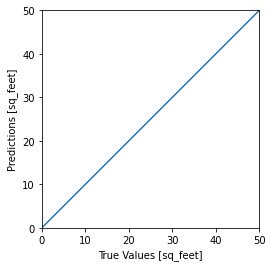

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [sq_feet]')
plt.ylabel('Predictions [sq_feet]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
#It looks like the model predicts unreasonably 
#let's take a look at the error distribution

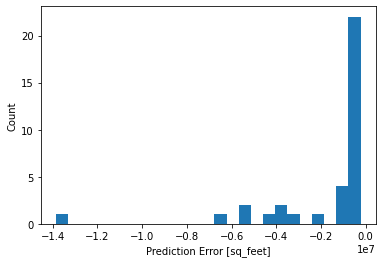

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [sq_feet]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [sq_feet]']).T

,Mean absolute error [sq_feet]
sqf_model,1874024.500
linear_model,1874022.000
dnn_sqf_model,1873413.875
dnn_model,1872859.750
reloaded,1872859.750


## Non Linear Regression with Keras and Tensorflow Backend

Epoch 1/100
14/14 - 0s - loss: 18703099887616.0000 - accuracy: 0.0000e+00
Epoch 2/100
14/14 - 0s - loss: 18703097790464.0000 - accuracy: 0.0000e+00
Epoch 3/100
14/14 - 0s - loss: 18703097790464.0000 - accuracy: 0.0000e+00
Epoch 4/100
14/14 - 0s - loss: 18703095693312.0000 - accuracy: 0.0000e+00
Epoch 5/100
14/14 - 0s - loss: 18703097790464.0000 - accuracy: 0.0000e+00
Epoch 6/100
14/14 - 0s - loss: 18703093596160.0000 - accuracy: 0.0000e+00
Epoch 7/100
14/14 - 0s - loss: 18703095693312.0000 - accuracy: 0.0000e+00
Epoch 8/100
14/14 - 0s - loss: 18703093596160.0000 - accuracy: 0.0000e+00
Epoch 9/100
14/14 - 0s - loss: 18703093596160.0000 - accuracy: 0.0000e+00
Epoch 10/100
14/14 - 0s - loss: 18703091499008.0000 - accuracy: 0.0000e+00
Epoch 11/100
14/14 - 0s - loss: 18703089401856.0000 - accuracy: 0.0000e+00
Epoch 12/100
14/14 - 0s - loss: 18703089401856.0000 - accuracy: 0.0000e+00
Epoch 13/100
14/14 - 0s - loss: 18703089401856.0000 - accuracy: 0.0000e+00
Epoch 14/100
14/14 - 0s - loss: 18

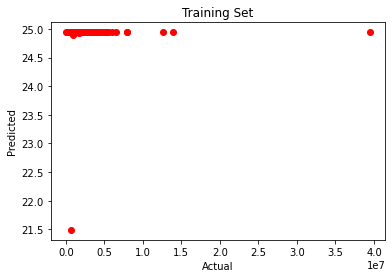

In [ ]:

TrainingSet = train_dataset
ValidationSet = test_dataset

X = pd.DataFrame(dataset1, columns=['beds','baths','sq_feet'])
y = pd.Series(dataset1['prices'])

X1, X2, Y1, Y2 = train_test_split(X, y, test_size=0.2,random_state=0)

# create model
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=3, kernel_initializer="uniform"))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X1, Y1, epochs=100, batch_size=10,  verbose=2)

# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)


Validation Set R-Square= -0.7125968934231306


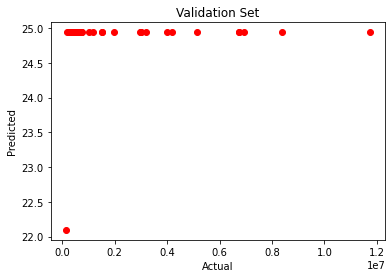

In [ ]:
#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2,ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

#Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)